# Binary classifier with a sigmoid neuron

Let's implement a simple sigmoid neuron to classify 2D points. First, we only need two libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

We will create two random distributions of points. One of the distribution is shifted, so there is a clear linear separation between both sets. We build a dataset with the points. 

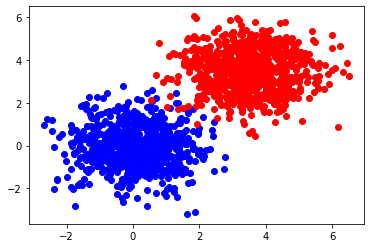

In [2]:
#Let's create a dataset of 2D points. The distribution is only shifted 3.5 units
X1 = np.random.randn(1000, 2)
X2 = np.random.randn(1000, 2) + 3.5

#The first 750 points of each distribution go in the training set
X_train = np.concatenate([X1[:750,:], X2[:750,:]], axis=0)

#The last 250 points of each distribution go in the test set
X_test = np.concatenate([X1[750:,:], X2[750:,:]], axis=0)

#We also create the labels
Y1 = np.zeros((1000, 1)) #The points in the first distribution have class 0
Y2 = np.ones((1000, 1)) # The points in the second distribution have class 1

#The first 750 labels of each distribution go in the training set
Y_train = np.concatenate([Y1[:750], Y2[:750]], axis=0)

#The last 250 labels of each distribution go in the test set
Y_test = np.concatenate([Y1[750:], Y2[750:]], axis=0)

#Plot the training set
plt.scatter(X_train[:750,0], X_train[:750,1], color='b')
plt.scatter(X_train[750:,0], X_train[750:,1], color='r')
plt.show()


We develop the neural network and the gradient descent algorithm for learning

In [3]:
#Definition of sigmoid function
def sigmoid(x):
    return 1/(1 + np.exp(-x))


#Let's implement the gradient descent algorithm

#Initialize random parameters
w1 = 2*np.random.rand(1) - 1
w2 = 2*np.random.rand(1) - 1
b = 2*np.random.rand(1) - 1

#Initialize hiper-parameters
learning_rate = 0.001
num_epochs = 100

#Log lists
log_train = []
log_test = []

#Iterate over the epochs
for i in range(num_epochs):
    cost = 0
    
    #Foe each epoch, iterate over the training samples
    for j in range(X_train.shape[0]):
        #Compute the linear function
        z = w1 * X_train[j,0] + w2 * X_train[j, 1] + b
        #Compute the activation function (sigmoid)
        y1 = sigmoid(z)
        
        #Compute error and cost for this sample
        error = y1 - Y_train[j]
        cost = cost + error**2
        
        #Compute the derivatives for each parameter        
        dw1 = error*y1*(1-y1)*X_train[j,0]
        dw2 = error*y1*(1-y1)*X_train[j,1]
        db = error*y1*(1-y1)
        
        #Perform the update rules        
        w1 = w1 - learning_rate*dw1
        w2 = w2 - learning_rate*dw2
        b = b - learning_rate*db
    
    #At the end of the epoch, we compute the total cost of the epoch
    cost = cost/(2*X_train.shape[0])
    log_train.append(cost)
    
    #We verify how good is the model so far, by computing the accuracy in the test set
    test_output = []
    cost = 0
    
    #Iterate over the test samples
    for j in range(X_test.shape[0]):
        #Compute the output of the neuron
        y1 = sigmoid(w1 * X_test[j,0] + w2 * X_test[j, 1] + b)
        cost = cost + (y1 - Y_test[j])**2
        test_output.append(y1)
    
    #Average the cost over the test set
    cost = cost / (2*X_test.shape[0])
    log_test.append(cost)
    
    test_output = np.asarray(test_output)
    test_output = (test_output >= 0.5)
    
    #Compare the output of the network with the correct labels
    correct = (test_output == Y_test).sum()
    
    print('Epoch {}/{}: loss = {}: Test accuracy={}'.format(i, num_epochs, cost, (100*correct)/test_output.shape[0]))
    
        

Epoch 0/100: loss = [0.03366734]: Test accuracy=93.8
Epoch 1/100: loss = [0.03218195]: Test accuracy=93.8
Epoch 2/100: loss = [0.03086267]: Test accuracy=94.2
Epoch 3/100: loss = [0.02968224]: Test accuracy=94.8
Epoch 4/100: loss = [0.02861741]: Test accuracy=95.6
Epoch 5/100: loss = [0.02764916]: Test accuracy=96.0
Epoch 6/100: loss = [0.0267624]: Test accuracy=96.0
Epoch 7/100: loss = [0.02594523]: Test accuracy=96.6
Epoch 8/100: loss = [0.02518825]: Test accuracy=96.6
Epoch 9/100: loss = [0.02448398]: Test accuracy=96.6
Epoch 10/100: loss = [0.02382637]: Test accuracy=96.8
Epoch 11/100: loss = [0.02321041]: Test accuracy=97.2
Epoch 12/100: loss = [0.02263194]: Test accuracy=97.4
Epoch 13/100: loss = [0.02208741]: Test accuracy=97.4
Epoch 14/100: loss = [0.02157375]: Test accuracy=97.4
Epoch 15/100: loss = [0.02108832]: Test accuracy=97.6
Epoch 16/100: loss = [0.02062877]: Test accuracy=97.6
Epoch 17/100: loss = [0.02019305]: Test accuracy=97.8
Epoch 18/100: loss = [0.01977931]: Test

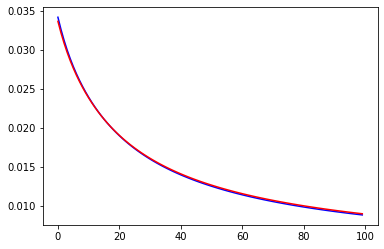

In [4]:
#Plot of historic logs
plt.plot(log_train, color='b')
plt.plot(log_test, color='r')

plt.show()

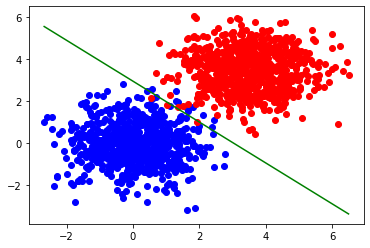

In [5]:
#Plot the boundary decision

x1_val = np.linspace(X_train[:,0].min(), X_train[:,0].max(), 100)
x2_val = (-b - (w1 * x1_val))/w2


plt.scatter(X_train[:750, 0], X_train[:750, 1], color='b')
plt.scatter(X_train[750:, 0], X_train[750:, 1], color='r')
plt.plot(x1_val, x2_val, 'g')